# Applied Data Science Capstone

This notebook is used to perform data analysis for the Applied Data Science Capstone project, part of the IBM Data Science Professional Certificate on Coursera. Here, we develop a Machine Learning model to predict the severity of car accidents according to historical data.

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats


In [36]:
car_data = pd.read_csv('Collisions.csv')

In [37]:
car_data.dtypes

X                  float64
Y                  float64
OBJECTID             int64
INCKEY               int64
COLDETKEY            int64
REPORTNO            object
STATUS              object
ADDRTYPE            object
INTKEY             float64
LOCATION            object
EXCEPTRSNCODE       object
EXCEPTRSNDESC       object
SEVERITYCODE        object
SEVERITYDESC        object
COLLISIONTYPE       object
PERSONCOUNT          int64
PEDCOUNT             int64
PEDCYLCOUNT          int64
VEHCOUNT             int64
INJURIES             int64
SERIOUSINJURIES      int64
FATALITIES           int64
INCDATE             object
INCDTTM             object
JUNCTIONTYPE        object
SDOT_COLCODE       float64
SDOT_COLDESC        object
INATTENTIONIND      object
UNDERINFL           object
WEATHER             object
ROADCOND            object
LIGHTCOND           object
PEDROWNOTGRNT       object
SDOTCOLNUM         float64
SPEEDING            object
ST_COLCODE          object
ST_COLDESC          object
S

In [38]:
car_data.groupby(car_data['SEVERITYCODE'])['LIGHTCOND'].value_counts()

SEVERITYCODE  LIGHTCOND               
0             Daylight                        2
1             Daylight                    78520
              Dark - Street Lights On     34346
              Unknown                     12898
              Dusk                         3997
              Dawn                         1706
              Dark - No Street Lights      1214
              Dark - Street Lights Off      890
              Other                         186
              Dark - Unknown Lighting        16
2             Daylight                    39077
              Dark - Street Lights On     14627
              Dusk                         1964
              Dawn                          838
              Unknown                       609
              Dark - No Street Lights       340
              Dark - Street Lights Off      317
              Other                          54
              Dark - Unknown Lighting         8
2b            Daylight                     1787
 

In [ ]:
car_data.groupby(car_data["SEVERITYCODE"])["UNDERINFL"].value_counts()

(array([5.45970e+04, 1.63813e+05, 2.52500e+03, 7.10000e+02, 7.10000e+01,
        1.00000e+01, 8.00000e+00, 2.00000e+00, 2.00000e+00]),
 array([ 0.        ,  1.66666667,  3.33333333,  5.        ,  6.66666667,
         8.33333333, 10.        , 11.66666667, 13.33333333, 15.        ]),
 <a list of 9 Patch objects>)

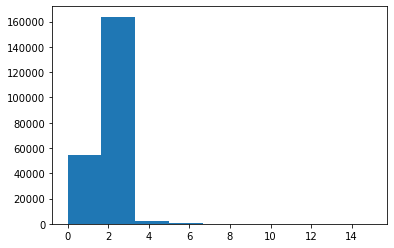

In [39]:
bins = np.linspace(car_data['VEHCOUNT'].min(),car_data['VEHCOUNT'].max(),10)
plt.hist(car_data['VEHCOUNT'],bins = bins)

In [122]:
car_data.corr()

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
X,1.000000,-0.156717,0.005674,0.005525,0.005521,0.118684,0.020183,0.011987,-0.002084,0.005731,0.015797,-0.005154,0.001266,0.018699,-0.004959,-0.000727,0.013841
Y,-0.156717,1.000000,-0.022902,-0.025838,-0.025856,-0.113394,-0.029879,0.009354,0.023564,-0.016302,0.001833,-0.003266,-0.005638,-0.025941,-0.007221,0.003465,0.007101
OBJECTID,0.005674,-0.022902,1.000000,0.947716,0.947180,0.047502,-0.070180,0.021200,0.028394,-0.104087,-0.005189,-0.005229,-0.000322,-0.082857,0.970452,0.023903,0.050061
INCKEY,0.005525,-0.025838,0.947716,1.000000,0.999996,0.048570,-0.069899,0.021484,0.025161,-0.113517,-0.004952,-0.004864,0.000675,-0.072672,0.990963,0.015431,0.041570
COLDETKEY,0.005521,-0.025856,0.947180,0.999996,1.000000,0.048549,-0.069823,0.021482,0.025120,-0.113567,-0.004940,-0.004838,0.000688,-0.072492,0.990963,0.015318,0.041445
INTKEY,0.118684,-0.113394,0.047502,0.048570,0.048549,1.000000,0.002212,-0.000804,0.000233,-0.005543,0.011924,0.010685,0.013384,0.007699,0.030851,-0.009843,0.019565
PERSONCOUNT,0.020183,-0.029879,-0.070180,-0.069899,-0.069823,0.002212,1.000000,0.012596,-0.009288,0.584942,0.307513,0.044013,0.017257,0.007921,0.011309,-0.008533,-0.010467
PEDCOUNT,0.011987,0.009354,0.021200,0.021484,0.021482,-0.000804,0.012596,1.000000,-0.015910,-0.154676,0.171979,0.159062,0.074107,0.260968,0.021197,0.001162,0.553734
PEDCYLCOUNT,-0.002084,0.023564,0.028394,0.025161,0.025120,0.000233,-0.009288,-0.015910,1.000000,-0.151208,0.126017,0.075027,0.011182,0.368996,0.031469,0.454064,0.103501
VEHCOUNT,0.005731,-0.016302,-0.104087,-0.113517,-0.113567,-0.005543,0.584942,-0.154676,-0.151208,1.000000,0.145021,-0.009468,-0.013464,-0.078359,-0.016615,-0.076299,-0.120720


(array([2.09803e+05, 1.13230e+04, 4.54000e+02, 7.40000e+01, 2.00000e+01,
        1.60000e+01, 1.60000e+01, 8.00000e+00, 7.00000e+00]),
 array([ 0.        ,  4.33333333,  8.66666667, 13.        , 17.33333333,
        21.66666667, 26.        , 30.33333333, 34.66666667, 39.        ]),
 <a list of 9 Patch objects>)

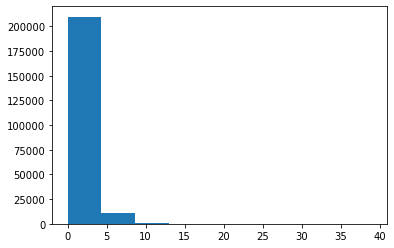

In [40]:
car_data.drop(car_data[car_data['PERSONCOUNT'] > 40].index,inplace = True)

bins = np.linspace(car_data['PERSONCOUNT'].min(),car_data['PERSONCOUNT'].max(),10)
plt.hist(car_data['PERSONCOUNT'],bins = bins)

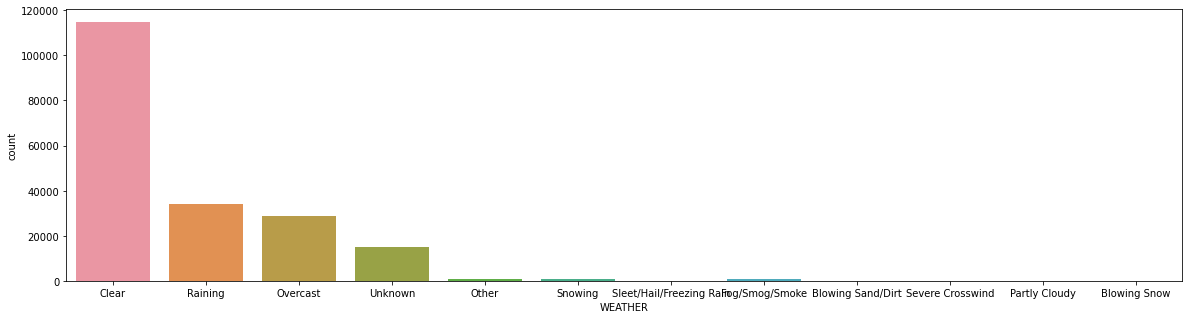

In [54]:
plt.figure(figsize=(20,5))
sns.countplot(car_data["WEATHER"])

In [7]:
car_data['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              89799
At Intersection (intersection related)               62803
Mid-Block (but intersection related)                 22782
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

In [12]:
car_data["ROADCOND"].value_counts().head(20)

Dry               124501
Wet                47468
Unknown            15078
Ice                 1209
Snow/Slush          1003
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

In [78]:
car_data["SPEEDING"].fillna(0,inplace = True)

In [79]:
# subset columns to be used
features = car_data.loc[:,["PERSONCOUNT","VEHCOUNT","JUNCTIONTYPE","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","UNDERINFL"]]

# count null values
features.isnull().sum()

# drop null values 
features.dropna(axis=0,inplace=True)

features.info

<bound method DataFrame.info of         PERSONCOUNT  VEHCOUNT                             JUNCTIONTYPE  \
0                 2         2   At Intersection (intersection related)   
1                 2         2  Mid-Block (not related to intersection)   
2                 2         2  Mid-Block (not related to intersection)   
3                 3         1   At Intersection (intersection related)   
4                 2         1  Mid-Block (not related to intersection)   
...             ...       ...                                      ...   
221732            3         2     Mid-Block (but intersection related)   
221734            2         2  Mid-Block (not related to intersection)   
221735            3         2   At Intersection (intersection related)   
221736            3         2   At Intersection (intersection related)   
221737            3         2  Mid-Block (not related to intersection)   

        WEATHER ROADCOND                LIGHTCOND SPEEDING  
0         Clear   

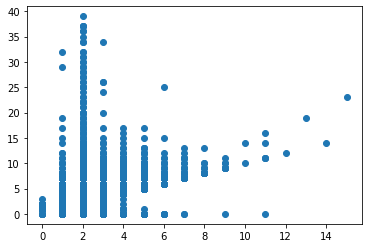

In [86]:
plt.scatter(features["VEHCOUNT"],features["PERSONCOUNT"])

In [89]:
features.loc[features["VEHCOUNT"] >= 7]

,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
883,7,7,Mid-Block (not related to intersection),Clear,Dry,Dark - Street Lights On,0
13756,9,8,Mid-Block (not related to intersection),Clear,Dry,Dark - Street Lights On,0
15647,8,8,Mid-Block (not related to intersection),Clear,Dry,Dark - Street Lights On,0
20078,11,11,Mid-Block (not related to intersection),Clear,Dry,Dawn,0
23107,10,9,At Intersection (intersection related),Overcast,Dry,Daylight,0
...,...,...,...,...,...,...,...
210997,9,9,Mid-Block (not related to intersection),Clear,Wet,Dark - No Street Lights,0
212298,7,7,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,0
218641,8,7,At Intersection (intersection related),Clear,Dry,Daylight,0
221147,10,7,At Intersection (intersection related),Clear,Dry,Daylight,0


In [96]:
features.loc[features["PERSONCOUNT"] >= 10]

,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
221,16,2,Mid-Block (but intersection related),Clear,Dry,Daylight,0
496,25,2,Mid-Block (not related to intersection),Overcast,Wet,Dark - Street Lights On,0
1084,12,4,Mid-Block (not related to intersection),Overcast,Dry,Daylight,0
1153,11,2,Mid-Block (not related to intersection),Clear,Dry,Daylight,0
1453,17,5,At Intersection (intersection related),Clear,Dry,Daylight,0
...,...,...,...,...,...,...,...
213820,12,5,At Intersection (intersection related),Raining,Wet,Daylight,0
218223,10,5,Mid-Block (not related to intersection),Raining,Wet,Dark - No Street Lights,Y
218251,10,2,At Intersection (intersection related),Clear,Dry,Daylight,0
220201,10,2,At Intersection (intersection related),Clear,Dry,Daylight,0


SEVERITYCODE  UNDERINFL
0             N                1
1             N            70741
              0            57686
              Y             3190
              1             2372
2             N            31633
              0            22700
              Y             1939
              1             1623
2b            N             1469
              0             1185
              Y              228
              1              184
3             N              146
              0               99
              1               51
              Y               42
Name: UNDERINFL, dtype: int64